<h1 style="text-align:center; color:blue;">Pet Venues in the city of São Paulo (Brazil)</h1>

<p style="text-align:center; font-size:18px;"><i>Fabio Rafael Salvioli</i></p> 
<p style="text-align:center; font-size:18px;"><b>06/2021<b></p>
    
<h2>Important: Unfortunately Github does not render the maps. To see it completely rendered acess the link below:</h2>
<a href="https://nbviewer.jupyter.org/github/fabiorafaelsalvioli/Coursera_Capstone/blob/main/Segmenting_Clustering_Neighborhoods_Toronto.ipynb" target="_blank">Access notebook here</a>

<h2>1.Introduction</h2>

<h3>1.1 Background</h3>

<p style="font-weight: normal; text-align: justify;">São Paulo is the largest city of Brazil and the largest city proper in the Americas and the southern hemisphere. It's one of the top 10 largest metropolitan areas in the world. The city of São Paulo is located in the state of São Paulo, being its capital. The State of São Paulo concentrates 25% of the population of pets in Brazil and its capital has a good share in this number.</p>

<p style="font-weight: normal; text-align: justify;">Brazil is the 4th in number of pets in the world, and the number of pets keeps growing every year as more and more people and families are looking for a pet for companionhip, giving and receiving affection and attention. With that, the demand and needs for pet services increases at the same proportion.</p>

<h3>1.2 Interests</h3>

<p style="font-weight: normal; text-align: justify;">The proposal of this work is to map the concentration per district of venues related to the pet market and, by doing this, help people to understand the districts with the most venues providing services to their pets and at the same time help entrepreneurs to better understand the pet market in the city of São Paulo.</p>

<p style="font-weight: normal; text-align: justify;">Wards in São Paulo, called Distritos (districts), are subdivisions of the boroughs, without a self-government.</p>

<h2>2.Data</h2>

<h3>2.1 Description</h3>

<p style="font-weight: normal; text-align: justify;">To achieve the objectives of this research it was necessary the data shown below:</p>

<ul style="font-weight: normal; text-align: justify;">
    <li>Data containing all the Districts of São Paulo from a wikipedia link;</li>
    <li>Dataframe cleaned with only the name of the districts;</li>
    <li>Used geopy library to get the latitude and longitude values of the districts of São Paulo;</li>
    <li>Used Foursquare API to get the venues per district filtered by the categories related to Pets;</li>
    <li>All the information of venues grouped by district to help infer a conclusion;</li>
</ul>

<h3>2.2 Data Use Solution</h3>

<p style="font-weight: normal; text-align: justify;">The objective of the data collected is to retrieve the number of pet venues per district in the city of São Paulo as well as present the districts with the highest concetration of pet services through a map of the city.</p>

<h2>3.Methodology</h2>

<h3>3.1 Necessary libraries imported</h3>

In [ ]:
import pandas as pd
import numpy as np
import requests

#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize  # tranform JSON file into a pandas dataframe
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

<ul>
    <li>Data with all the Districts of São Paulo scrapped from a wikipedia link;</li>
    <li>Data cleaning to create a dataframe with only the name of the districts;</li>
    <li>Used geopy library to get the latitude and longitude values of the districts of São Paulo;</li>
    <li>Inserted the information returned from geopy to the districts dataframe;</li>
    <li>Used Forsquare API to get the venues per district filtered by the categories related to Pets "Pet Services", "Pet Store", "Dog Runs" and "Veterinarians";;</li>
    <li>Grouped all the information by District so the number of venues per each one could be acquired;</li>
</ul>

<h3>3.2 Requesting Data from wikipedia to get the names of the districts</h3>

In [107]:
url = requests.get("https://pt.wikipedia.org/wiki/Lista_dos_distritos_de_São_Paulo_por_população")
url.text

df = pd.read_html(url.text)
df[1]

,Posição,Distrito,População 2010,Unnamed: 3
0,1.0,Grajaú,360.787,NaN
1,2.0,Jardim Ângela,295.434,NaN
2,3.0,Sapopemba,284.524,NaN
3,4.0,Capão Redondo,268.729,NaN
4,5.0,Jardim São Luís,267.871,NaN
...,...,...,...,...
92,93.0,Sé,23.651,NaN
93,94.0,Pari,17.299,NaN
94,95.0,Barra Funda,14.383,NaN
95,96.0,Marsilac,8.258,NaN


<h3>3.3 Cleaning the data to show only the important information</h3>

In [113]:
df_districts = df[1].iloc[:,[1]]
df_districts = df_districts.dropna(axis=0)
df_districts

,Distrito
0,Grajaú
1,Jardim Ângela
2,Sapopemba
3,Capão Redondo
4,Jardim São Luís
...,...
91,Jaguara
92,Sé
93,Pari
94,Barra Funda


<h3>3.4 Using geopy library to get the latitude and longitude values of the districts of São Paulo. Creating new columns to dataframe and inserting latitude and longitude information into these columns</h3>

In [ ]:
df_districts = df_districts.rename(columns={"Distrito": "District"})
df_districts["Latitude"]= ""
df_districts["Longitude"]= ""
y=0
for x in df_districts.loc[:,'District']:
    geolocator = Nominatim(user_agent="SaoPaulo_Districts")
    location = geolocator.geocode("{}, São Paulo, Brazil".format(x))
    df_districts.loc[y, 'Latitude'] = location.latitude
    df_districts.loc[y, 'Longitude'] = location.longitude
    y+=1

In [115]:
df_districts

,District,Latitude,Longitude
0,Grajaú,-23.785907,-46.665197
1,Jardim Ângela,-23.712528,-46.76872
2,Sapopemba,-23.604326,-46.509885
3,Capão Redondo,-23.671903,-46.779435
4,Jardim São Luís,-23.683573,-46.737762
...,...,...,...
91,Jaguara,-23.507446,-46.755315
92,Sé,-23.550443,-46.633446
93,Pari,-23.532976,-46.615849
94,Barra Funda,-23.525462,-46.667513


In [120]:
df_districts.shape

(96, 3)

<h3>3.5 Using geopy library to get the latitude and longitude values of the city of São Paulo</h3>

In [74]:
address = 'São Paulo, SP'

geolocator = Nominatim(user_agent="SaoPaulo_Districts")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of São Paulo are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of São Paulo are -23.5506507, -46.6333824.


<h3>3.6 Creating map of São Paulo using latitude and longitude values and adding markers representing the Districts to map</h3>


In [76]:
import folium
map_saopaulo = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(df_districts['Latitude'], df_districts['Longitude'], df_districts['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_saopaulo)  
    
map_saopaulo

<h3>3.7 Defining the credentials to acess Foursquare API where the information of the venues will be collected</h3>

In [40]:
CLIENT_ID = 'LV4HW1PJ0P34QE3KNVHMRUBGHUIVQL024QFHP3NO3CIHG0D4' # your Foursquare ID
CLIENT_SECRET = 'AHR3QP4E5OWXJWEGSDKFAUBE3SAPCIPNGFL5KBQQFC55UTWC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LV4HW1PJ0P34QE3KNVHMRUBGHUIVQL024QFHP3NO3CIHG0D4
CLIENT_SECRET:AHR3QP4E5OWXJWEGSDKFAUBE3SAPCIPNGFL5KBQQFC55UTWC


<h3>3.8 Defining the categories that are going to be the filters of the venues search</h3>

<p>The categories selected related to Pets were "Pet Services", "Pet Store", "Dog Runs" and "Veterinarians";</p>

In [121]:
search_query = 'Pet'
CATEGORY_ID1 = "4d954af4a243a5684765b473" #veterinarians
CATEGORY_ID2 = "4bf58dd8d48988d1e5941735" #dog runs
CATEGORY_ID3 = "4bf58dd8d48988d100951735" #pet store
CATEGORY_ID4 = "5032897c91d4c4b30a586d69" #pet services

The function in this work involves returning a JSON with all the venues within a 1.5km radius from the centre of every district. 

In [122]:
def getVenues(names, latitudes, longitudes, RADIUS=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?categoryId={},{},{},{}&client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CATEGORY_ID1, CATEGORY_ID2, CATEGORY_ID3, CATEGORY_ID4, CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search_query, RADIUS, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

<h3>3.9 Using the function above to retrieve the venues for each District below</h3>

In [78]:
saopaulo_petvenues = getVenues(names=df_districts['District'],
                                   latitudes=df_districts['Latitude'],
                                   longitudes=df_districts['Longitude']
                                  )

Grajaú
Jardim Ângela
Sapopemba
Capão Redondo
Jardim São Luís
Cidade Ademar
Brasilândia
Sacomã
Itaim Paulista
Jabaquara
Cidade Tiradentes
Campo Limpo
Itaquera
Tremembé
Cidade Dutra
Jaraguá
Lajeado
Pirituba
São Mateus
Vila Curuçá
Pedreira
São Rafael
Cachoeirinha
Vila Jacuí
São Lucas
Freguesia do Ó
Cangaíba
Jardim Helena
Parelheiros
Saúde
Vila Mariana
Vila Medeiros
Penha
Iguatemi
Vila Andrade
Cidade Líder
José Bonifácio
Santana
Rio Pequeno
Ermelino Matarazzo
Vila Maria
Perdizes
Cursino
Vila Sônia
Mandaqui
Ipiranga
Artur Alvim
Vila Matilde
Vila Prudente
Guaianases
Campo Grande
Raposo Tavares
Tucuruvi
Vila Formosa
Jaçanã
Ponte Rasa
Itaim Bibi
São Miguel Paulista
Tatuapé
Aricanduva
Jardim Paulista
Casa Verde
Água Rasa
São Domingos
Santa Cecília
Moema
Carrão
Limão
Perus
Santo Amaro
Bela Vista
Liberdade
Parque do Carmo
Anhanguera
Lapa
Pinheiros
Mooca
Campo Belo
Consolação
Vila Guilherme
Butantã
República
Jaguaré
Morumbi
Belém
Alto de Pinheiros
Vila Leopoldina
Socorro
Cambuci
Bom Retiro
Brás
Ja

<h3>3.10 As we can see, it has been gotten 1852 in total for the districts</h3>


In [170]:
print(saopaulo_petvenues.shape)
saopaulo_petvenues

(1852, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sapopemba,-23.604326,-46.509885,Pet Shop Picharrão,-23.605249,-46.505833,Pet Store
1,Sapopemba,-23.604326,-46.509885,Pet Shop Trovão do Sul,-23.600555,-46.512103,Pet Store
2,Sapopemba,-23.604326,-46.509885,Pet Shop Imperador,-23.595375,-46.503918,Pet Store
3,Sapopemba,-23.604326,-46.509885,Pet Shop Bancário,-23.592216,-46.511424,Pet Store
4,Sapopemba,-23.604326,-46.509885,Pet Shop,-23.592958,-46.511234,Pet Store
...,...,...,...,...,...,...,...
1847,Barra Funda,-23.525462,-46.667513,ElevenChimps,-23.536500,-46.660449,Pet Service
1848,Barra Funda,-23.525462,-46.667513,Happy Pets,-23.533499,-46.670977,Pet Store
1849,Barra Funda,-23.525462,-46.667513,Petland,-23.538435,-46.679265,Pet Store
1850,Barra Funda,-23.525462,-46.667513,Tutti & Petti,-23.527236,-46.674573,Pet Store


<h3>3.11 Cleaning the data and retrieving the information of the number of venues per district</h3>


Here is the most important return in the project. After all the other data processing a dataframe with the information is going to ready for analysis and later conclusions. 

In [80]:
district_pet_venues = saopaulo_petvenues.groupby('District').count().iloc[:,[2]]
district_pet_venues

,Venue
District,
Alto de Pinheiros,18
Anhanguera,1
Aricanduva,17
Artur Alvim,16
Barra Funda,42
...,...
Vila Matilde,31
Vila Medeiros,16
Vila Prudente,20


In [81]:
district_pet_venues = pd.merge(df_districts, district_pet_venues, how = 'outer', on = 'District')
district_pet_venues

,District,Latitude,Longitude,Venue
0,Grajaú,-23.785907,-46.665197,NaN
1,Jardim Ângela,-23.712528,-46.76872,NaN
2,Sapopemba,-23.604326,-46.509885,13.0
3,Capão Redondo,-23.671903,-46.779435,8.0
4,Jardim São Luís,-23.683573,-46.737762,5.0
...,...,...,...,...
91,Jaguara,-23.507446,-46.755315,16.0
92,Sé,-23.550443,-46.633446,39.0
93,Pari,-23.532976,-46.615849,6.0
94,Barra Funda,-23.525462,-46.667513,42.0


<h3>3.12 Below there is the final dataframe with the 96 districts with their related number of venues cleaned</h3>


In [126]:
district_number_venues = district_pet_venues.fillna(0).rename(columns={"Venue": "Number of Venues"})
district_number_venues["Number of Venues"] = district_number_venues["Number of Venues"].astype(int)
district_number_venues

,District,Latitude,Longitude,Number of Venues
0,Grajaú,-23.785907,-46.665197,0
1,Jardim Ângela,-23.712528,-46.768720,0
2,Sapopemba,-23.604326,-46.509885,13
3,Capão Redondo,-23.671903,-46.779435,8
4,Jardim São Luís,-23.683573,-46.737762,5
...,...,...,...,...
91,Jaguara,-23.507446,-46.755315,16
92,Sé,-23.550443,-46.633446,39
93,Pari,-23.532976,-46.615849,6
94,Barra Funda,-23.525462,-46.667513,42


<h3>3.13 And the dataframes sorted showing the 5 districts with more venues and the ones with less venues</h3>



<p>This data shows the 5 districts with higher number of pet venues and the 5 districts with the lower number of pet venues</p>

In [132]:
sorted_district_number_venues = district_number_venues.sort_values("Number of Venues", ascending=False).reset_index().drop(columns=["index"])
sorted_district_number_venues

,District,Latitude,Longitude,Number of Venues
0,Moema,-23.597085,-46.662888,50
1,Perdizes,-23.537929,-46.680671,50
2,Vila Mariana,-23.583700,-46.632741,50
3,Tatuapé,-23.540252,-46.576642,50
4,República,-23.545335,-46.642257,50
...,...,...,...,...
91,Jardim Ângela,-23.712528,-46.768720,0
92,José Bonifácio,-23.564115,-46.434737,0
93,Parelheiros,-23.824791,-46.733078,0
94,Tremembé,-22.957140,-45.547526,0


<h3>3.14 Below the last dataframe with the quantity of districts per range of numbers of venues</h3>



In [165]:
data = {"Range Pet Venues":["0-12", "13-25", "26-37","38-50"], "Quantity of Districts":[0,0,0,0]}
df_range = pd.DataFrame(data)


for x in sorted_district_number_venues.loc[:,'Number of Venues']:
    numbervenues = x
    if numbervenues <= 12:
         df_range.loc[0, "Quantity of Districts"] = (df_range["Quantity of Districts"][0])+1
    elif numbervenues <= 25:
        df_range.loc[1, "Quantity of Districts"]= (df_range["Quantity of Districts"][1])+1
    elif numbervenues <= 37:
        df_range.loc[2, "Quantity of Districts"] = (df_range["Quantity of Districts"][2])+1
    else:
        df_range.loc[3,"Quantity of Districts"]= (df_range["Quantity of Districts"][3])+1

df_range.set_index("Range Pet Venues", inplace=True)
df_range

,Quantity of Districts
Range Pet Venues,
0-12,39
13-25,30
26-37,11
38-50,16


<h2>4.Results and Discussion</h2>

<h3>4.1 Below we are plotting the maps showing the conclusion of the research</h3>



<p>After all the data collected, cleaned and checked it's time to understand and visualize the results and make some conclusions of it.

<p>There will be 3 maps: One of then showing the distribution of the Pet Venues for the city of São Paulo. The Second showing the distribution of the districts, and the last one showing graphically the concentration of venues per district</p>

<h3>4.2 Map with the Pet Venues for the city of São Paulo</h3>



In [84]:
map_saopaulo_petvenues = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(saopaulo_petvenues['Venue Latitude'], saopaulo_petvenues['Venue Longitude'], saopaulo_petvenues['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_saopaulo_petvenues)  
    
map_saopaulo_petvenues

<h3>4.3 Map with the Districts for the city of São Paulo showing through popup the name and the numbers of Pet Venues for the district</h3>



In [94]:
map_district_number_venues = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label, nv in zip(district_number_venues['Latitude'], district_number_venues['Longitude'], district_number_venues['District'], district_number_venues['Number of Venues']):
    label = (f"District: {label} (Number of Pet Venues: {nv})") 
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_district_number_venues)  
    
map_district_number_venues

<h3>4.2 Map showing graphically the concentration of venues per district</h3>



<p>The markers of this map wich correspond to the districts were divided into 4 ranges: (0-12),(13-25),(26-37), (38-50). Each range going from color red to green where red corresponds to the districts with less number of Pet Venues and green correspondes to the districts with more number of Pet Venues.</p>

In [95]:
max = district_number_venues['Number of Venues'].max()
max

50

In [134]:
def defineColors (numbervenues):
    if numbervenues <= 12:
        return "#cc3131" #red color
    elif numbervenues <= 25:
        return "#f2b31f" #orange color
    elif numbervenues <= 37:
        return "#eff21f" #yellow color
    elif numbervenues <= 50:
        return "#1ff21f" #green color

In [135]:
map_district_number_venues = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label, nv in zip(district_number_venues['Latitude'], district_number_venues['Longitude'], district_number_venues['District'], district_number_venues['Number of Venues']):
    label = (f"District: {label} (Number of Pet Venues: {nv})") 
    
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='white',
        fill=True,
        fill_color=defineColors(nv),
        fill_opacity=0.7,
        parse_html=False).add_to(map_district_number_venues)  
    
map_district_number_venues

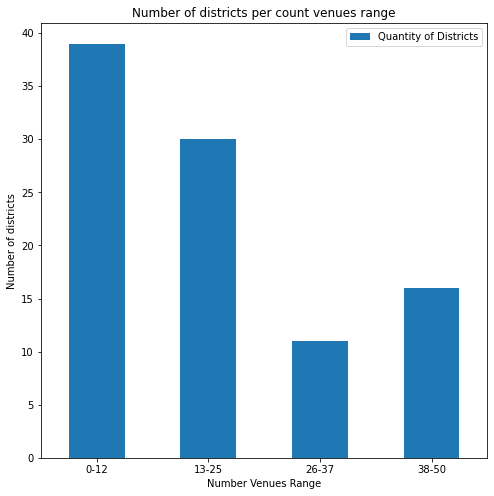

In [166]:
import matplotlib.pyplot as plt

df_range.plot(kind='bar', figsize=(8,8), rot=0)
plt.xlabel("Number Venues Range")
plt.ylabel("Number of districts")
plt.title("Number of districts per count venues range")
plt.show()          

<p>As seen on map item 4.2, São Paulo has a large number of venues that are Pet Related. Actually, the foursquare API returned 1852 places for pets in the city. The number of districts in São Paulo is 96.</p> 
<p>By the map on item 4.2 we are able to notice, as expected, how the districts that are closest to downtown have the higher number of Pet Venues. As we move away from downtown, the offer of pet services and others drop proportionately.</p> 
<p>Through the results above we can infer that districts with greater purchasing power tend to have more options for those who have pets.</p>
<p>For the entrepreneurs who are aiming to start a new pet business, maybe it's time to look for areas further from downtown to have less competition and be able to serve the population that often cannot or does not want to walk so much around the city in search of services for their own pets.</p>

<h2>6.Conclusion</h2>

<p>The pet market in Brazil and, specially, in São Paulo growns every year as more and more people are looking and desiring a pet for companion.<p>
<p>This project achieved its objective on showing the Pet Market for the city of São Paulo with a clear and defined view of the situation and aimed to help the population and businesses on knowing the distribution for Pet venues in the city and helping them to decide to more information when looking for a place to live or starting a business.</p>
<p>For the analytic approach it was selected the descriptive approach as the purpose of the work was to show relationships between Districts and its pet related venues.</p>